  Rank                                          Title           Distributor  \
0    1  Harry Potter and the Deathly Hallows – Part 2          Warner Bros.   
1    2                 Transformers: Dark of the Moon             Paramount   
2    3      The Twilight Saga: Breaking Dawn – Part 1  Summit Entertainment   
3    4                           The Hangover Part II          Warner Bros.   
4    5    Pirates of the Caribbean: On Stranger Tides                Disney   
5    6                                      Fast Five             Universal   
6    7           Mission: Impossible – Ghost Protocol             Paramount   
7    8                                         Cars 2                Disney   
8    9             Sherlock Holmes: A Game of Shadows          Warner Bros.   
9   10                                           Thor             Paramount   

  Domestic Gross  
0   $381,011,219  
1   $352,390,543  
2   $281,287,133  
3   $254,464,305  
4   $241,071,802  
5   $209,837,675

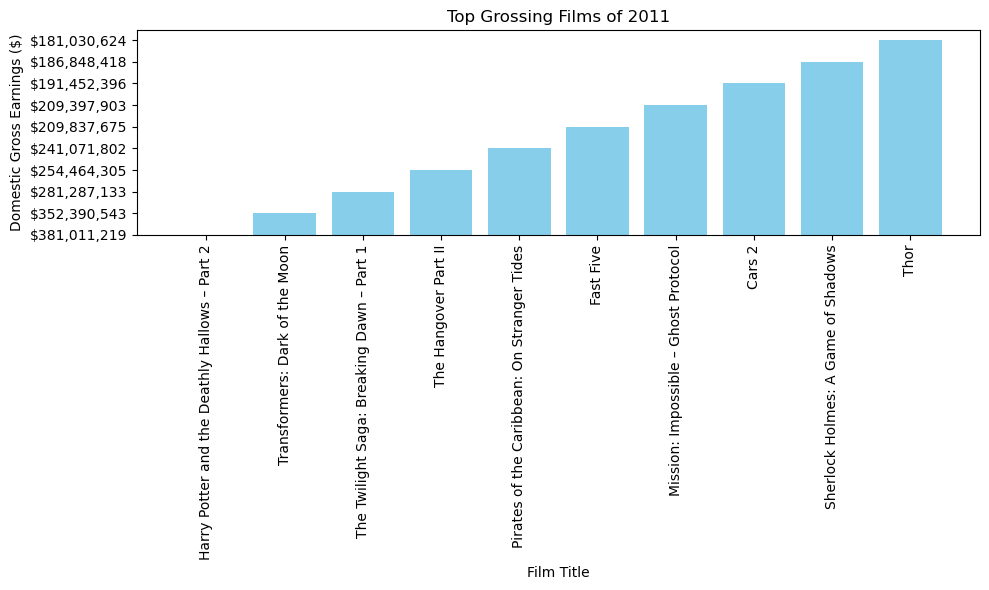

In [2]:
import ssl
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Suppress SSL certificate verification warnings
ssl._create_default_https_context = ssl._create_unverified_context

# URL of the Wikipedia page containing the data
url = "https://en.wikipedia.org/wiki/List_of_American_films_of_2011"

# Open the URL and create a BeautifulSoup object
page = urlopen(url)
bs = BeautifulSoup(page.read(), "html.parser")

# Find the table containing the data
all_sortable_tables = bs.find_all("table", class_="wikitable")
table = all_sortable_tables[0]

# Lists to store data from the table
A = []
B = []
C = []
D = []

# Extract data from each row of the table
for row in table.find_all("tr")[1:]:  
    cells = row.find_all(["th", "td"])
    if len(cells) >= 4:  
        A.append(cells[0].get_text().strip())  
        B.append(cells[1].get_text().strip())  
        C.append(cells[2].get_text().strip())  
        D.append(cells[3].get_text().strip())  

# Create a DataFrame from the extracted data
df = pd.DataFrame({'Rank': A, 'Title': B, 'Distributor': C, 'Domestic Gross': D})

# Print the DataFrame
print(df)

# Save DataFrame to a CSV file
df.to_csv("Top_Grossing_2011_films.csv")

# Print a message indicating the CSV file creation
print("Top Grossing 2011 films data saved to CSV")

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(df['Title'], df['Domestic Gross'], color='skyblue')

# Adding enhancements to the plot
plt.title('Top Grossing Films of 2011')
plt.xlabel('Film Title')
plt.ylabel('Domestic Gross Earnings ($)')
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()
